In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import numpy as np
import scipy.ndimage.morphology as morphOps
from PIL import Image

In [59]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

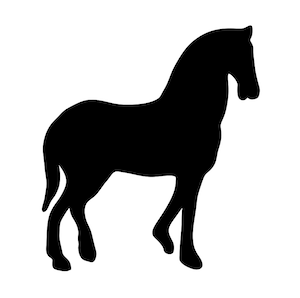

In [82]:
fileName = "horse.png"
I=Image.open(fileName)
I

In [68]:
I = I.resize((np.array(I.size) * 0.3).astype(int))
I = np.asarray(I)

In [69]:
I = rgb2gray(I)
I = 1-I
print(I.shape)

(89, 90)


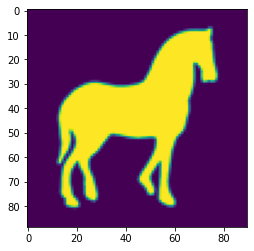

In [70]:
imgplot = plt.imshow(I)
plt.show()

In [71]:
number_of_samples = 60
epsilon = 1 
flux_threshold = 18

In [83]:
distImage,IDX = morphOps.distance_transform_edt(I,return_indices=True);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


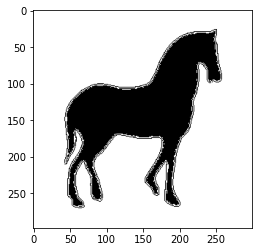

In [92]:
plt.imshow(distImage)

In [93]:
def sample_sphere_2D(number_of_samples):
    sphere_points = np.zeros((number_of_samples,2))
    alpha = (2*math.pi)/(number_of_samples)
    for i in range(number_of_samples):
        sphere_points[i][0] = math.cos(alpha*(i-1))
        sphere_points[i][1] = math.sin(alpha*(i-1))
    return sphere_points

In [94]:
print(number_of_samples)


60


In [95]:
sphere_points = sample_sphere_2D(number_of_samples)

In [96]:
def sub2ind(array_shape, rows, cols):
    ind = rows*array_shape[1] + cols
    ind[ind < 0] = -1
    ind[ind >= array_shape[0]*array_shape[1]] = -1
    return ind

def ind2sub(array_shape, ind):
    ind[ind < 0] = -1
    ind[ind >= array_shape[0]*array_shape[1]] = -1
    rows = (ind.astype('int') / array_shape[1])
    cols = ind % array_shape[1]
    return (rows, cols)

def compute_aof(distImage ,IDX,sphere_points,epsilon):

    m = distImage.shape[0]
    n = distImage.shape[1]
    normals = np.zeros(sphere_points.shape)
    fluxImage = np.zeros((m,n))
    for t in range(0,number_of_samples):
        normals[t] = sphere_points[t]
    sphere_points = sphere_points * epsilon
    
    XInds = IDX[0]
    YInds = IDX[1]
    
    for i in range(0,m):
        print(i)
        for j in range(0,n):       
            flux_value = 0
            if (distImage[i][j] > -1.5):
                if( i > epsilon and j > epsilon and i < m - epsilon and j < n - epsilon ):
#                   sum over dot product of normal and the gradient vector field (q-dot)
                    for ind in range (0,number_of_samples):
                                                
#                       a point on the sphere
                        px = i+sphere_points[ind][0]+0.5;
                        py = j+sphere_points[ind][1]+0.5;
                        
                        
                        
                        
#                       the indices of the grid cell that sphere points fall into 
                        cI = math.floor(i+sphere_points[ind][0]+0.5)
                        cJ = math.floor(j+sphere_points[ind][1]+0.5)
                                               

#                       closest point on the boundary to that sphere point

                        bx = XInds[cI][cJ]
                        by = YInds[cI][cJ]
#                       the vector connect them
                        qq = [bx-px,by-py]
                    
                        d = np.linalg.norm(qq)
                        if(d!=0):
                            qq = qq / d
                        else:
                            qq = [0,0]                        
                        flux_value = flux_value + np.dot(qq,normals[ind])
            fluxImage[i][j] = flux_value  
    return fluxImage

In [97]:
fluxImage = compute_aof(distImage,IDX,sphere_points,epsilon)

0


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [89]:
print(fluxImage.shape)

(89, 90)


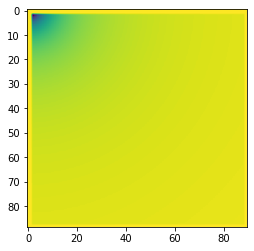

In [91]:
plt.imshow(fluxImage)
